In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dengue-dataset.csv' ,sep=',' , encoding='iso-8859-1')

In [3]:
df.head()

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


In [4]:
df.tail()

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
199,2014-08-01,55,12.2,20.6,13.1,24.7
200,2014-09-01,40,69.2,23.0,18.6,26.8
201,2014-10-01,40,15.6,24.7,17.2,30.0
202,2014-11-01,57,154.8,25.0,22.1,28.3
203,2014-12-01,37,232.8,24.9,21.3,27.8


In [5]:
df.shape

(204, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   data                  204 non-null    object 
 1   casos-confirmados     204 non-null    int64  
 2   chuva                 196 non-null    float64
 3   temperatura-media     204 non-null    float64
 4   temperatura-mininima  204 non-null    float64
 5   temperatura-maxima    204 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.7+ KB


In [7]:
df.isnull().sum()

data                    0
casos-confirmados       0
chuva                   8
temperatura-media       0
temperatura-mininima    0
temperatura-maxima      0
dtype: int64

In [22]:
# EXCLUIR VALORES MISSING
df2 = df.dropna()

In [24]:
# SUBSTITUIR OS VALORES MISSING POR QUALQUER OUTRO VALOR
df2['chuva'].fillna(0, inplace=True)

C:\Users\gusta\AppData\Local\Temp\ipykernel_6052\1095960597.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\gusta\AppData\Local\Temp\ipykernel_6052\1095960597.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# *Analise de dados*

In [8]:
import seaborn as sns
import plotly.express as px

*chuva*

In [9]:
hist1 =  px.histogram (df,  x = "chuva", nbins=60) 
hist1.update_layout(width=800,height=500,title_text='Distribuição da chuva') 
hist1.show()

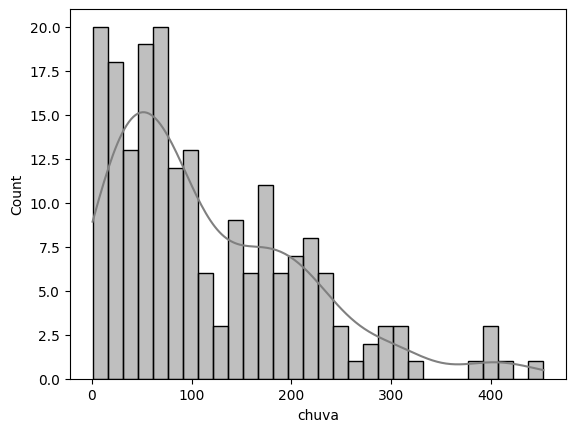

In [18]:
sns.histplot(df, x='chuva', bins=30, color="grey", kde=True, stat="count");

*temperatura minima*

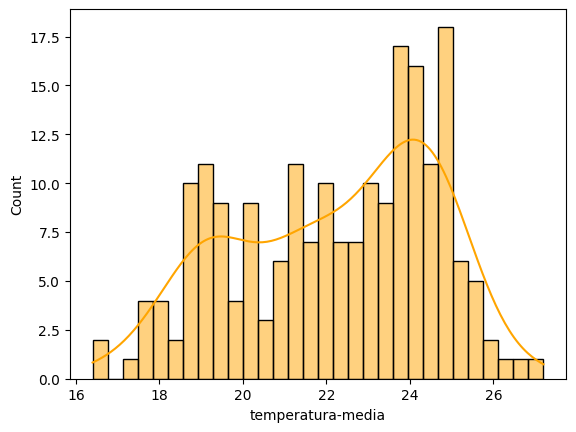

In [11]:
sns.histplot(df, x='temperatura-media', bins=30, color="orange", kde=True, stat="count");

*temperatura maxima*

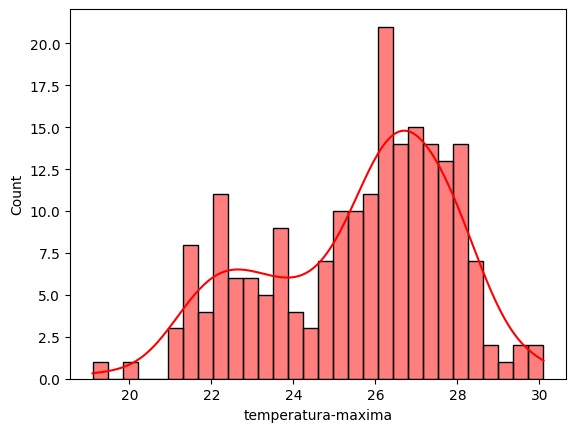

In [17]:
sns.histplot(df, x='temperatura-maxima', bins=30, color="red", kde=True, stat="count");

*temperatura-mininima*

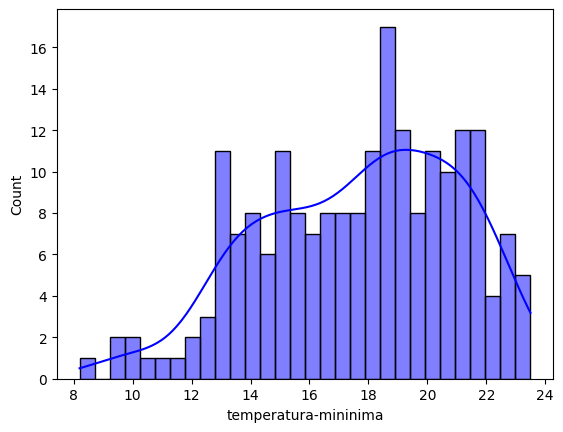

In [16]:
sns.histplot(df, x='temperatura-mininima', bins=30, color="blue", kde=True, stat="count");

# **Análise de Outliers**

In [25]:
# chuva
px.box(df2, y='chuva')

In [26]:
# temperatura-maxima
px.box(df2, y='temperatura-maxima')

In [27]:
# temperatura-media
px.box(df2, y='temperatura-media')

In [29]:
# temperatura-mininima
px.box(df2, y='temperatura-mininima')

In [28]:
# casos-confirmados
px.box(df2, y='casos-confirmados')

# *ATRIBUTOS PREVISORES E ALVO*

In [30]:
df2.head()

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


In [33]:
previsores = df2.iloc[:, 1:6].values

In [34]:
previsores

array([[2.3700e+02, 1.7920e+02, 2.5700e+01, 2.0200e+01, 2.8100e+01],
       [3.3100e+02, 2.2630e+02, 2.5100e+01, 2.0000e+01, 2.8000e+01],
       [5.6200e+02, 1.4910e+02, 2.4800e+01, 2.2400e+01, 2.7200e+01],
       [1.8700e+02, 4.6400e+01, 2.2700e+01, 1.8100e+01, 2.6000e+01],
       [3.2000e+01, 8.8300e+01, 1.9200e+01, 1.5700e+01, 2.2900e+01],
       [1.1000e+01, 2.1200e+01, 1.8000e+01, 1.5400e+01, 2.1200e+01],
       [6.0000e+00, 7.9000e+00, 1.9000e+01, 1.3500e+01, 2.2900e+01],
       [4.0000e+00, 1.5600e+01, 2.1700e+01, 1.7000e+01, 2.5700e+01],
       [7.0000e+00, 8.8100e+01, 2.1900e+01, 1.8900e+01, 2.6100e+01],
       [7.0000e+00, 1.6730e+02, 2.1900e+01, 1.8400e+01, 2.4600e+01],
       [5.0000e+00, 5.5400e+01, 2.3400e+01, 2.0300e+01, 2.7300e+01],
       [8.0000e+00, 3.0910e+02, 2.4300e+01, 2.0600e+01, 2.8100e+01],
       [7.0000e+00, 4.2030e+02, 2.5100e+01, 2.1300e+01, 2.8500e+01],
       [1.2000e+01, 2.2810e+02, 2.4600e+01, 2.2500e+01, 2.6300e+01],
       [2.7000e+01, 1.4050e+02, 2.

In [35]:
previsores.shape

(196, 5)

In [36]:
alvo = df2.iloc[:, 1].values

In [37]:
alvo

array([  237,   331,   562,   187,    32,    11,     6,     4,     7,
           7,     5,     8,     7,    12,    27,    49,     8,     3,
           3,     0,     0,     4,     6,    11,    21,    15,     8,
           4,     4,     3,     0,     2,     2,     5,    32,    38,
         160,   223,   136,    21,    13,    10,     2,     2,     5,
          86,   224,   364,   348,   266,   156,     8,     9,     6,
           4,     7,    22,    90,    91,   125,    76,    28,     7,
           2,     0,     0,     1,     0,     3,     9,     8,     6,
           3,     1,     0,     0,     0,     0,     0,     3,     5,
           7,     8,    38,    29,    17,     8,     2,     2,     0,
           0,     3,     8,    24,   187,   292,   129,    31,     7,
          16,    10,    17,    10,    11,   169,   922,  3213,  4207,
        2364,   300,    67,    35,    49,    57,    42,    40,    37,
          72,    79,    21,    10,     9,     2,     8,     6,    14,
          17,    29,

# *Análise das escalas dos atributos (Escalonamento)*

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [40]:
previsores_esc

array([[-7.60027417e-02,  6.48961326e-01,  1.42242565e+00,
         7.33802845e-01,  1.09459784e+00],
       [-2.29318866e-02,  1.13762765e+00,  1.17212301e+00,
         6.73875613e-01,  1.04970536e+00],
       [ 1.07486917e-01,  3.36671384e-01,  1.04697168e+00,
         1.39300240e+00,  6.90565492e-01],
       [-1.04231920e-01, -7.28849451e-01,  1.70912434e-01,
         1.04566905e-01,  1.51855695e-01],
       [-1.91742373e-01, -2.94133551e-01, -1.28918632e+00,
        -6.14559883e-01, -1.23981128e+00],
       [-2.03598628e-01, -9.90301496e-01, -1.78979160e+00,
        -7.04450731e-01, -2.00298349e+00],
       [-2.06421545e-01, -1.12829008e+00, -1.37262053e+00,
        -1.27375944e+00, -1.23981128e+00],
       [-2.07550712e-01, -1.04840195e+00, -2.46258638e-01,
        -2.25032872e-01,  1.71782461e-02],
       [-2.05856962e-01, -2.96208567e-01, -1.62824423e-01,
         3.44275835e-01,  1.96748178e-01],
       [-2.05856962e-01,  5.25497861e-01, -1.62824423e-01,
         1.94457754e-01

*Transformando em dataframe*

In [41]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4
0,-0.076003,0.648961,1.422426,0.733803,1.094598
1,-0.022932,1.137628,1.172123,0.673876,1.049705
2,0.107487,0.336671,1.046972,1.393002,0.690565
3,-0.104232,-0.728849,0.170912,0.104567,0.151856
4,-0.191742,-0.294134,-1.289186,-0.614560,-1.239811
...,...,...,...,...,...
191,-0.178757,-1.083677,-0.705147,-1.393614,-0.431747
192,-0.187226,-0.492298,0.296064,0.254385,0.510996
193,-0.187226,-1.048402,1.005255,-0.165106,1.947555
194,-0.177628,0.395809,1.130406,1.303112,1.184383


# *BASE DE TREINO E TESTE*

In [43]:
from sklearn.model_selection import train_test_split

In [310]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.1, random_state = 0)

In [73]:
x_teste.shape

(59, 5)

In [74]:
x_treino.shape

(137, 5)

# **NAIVE BAYES**

In [99]:
from sklearn.naive_bayes import GaussianNB

In [100]:
naive = GaussianNB()
naive.fit(x_treino, y_treino)

GaussianNB()

In [101]:
previsoes_naive = naive.predict(x_teste)
previsoes_naive

array([ 40,   7,   5,  53,  22,   2, 187,   6,   0,   3,   4,  11,  16,
        49,  11,  29,   8,  53,   5, 922])

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_teste, previsoes_naive)
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_naive) * 100.0))

Acurácia: 60.00%


**Análise dados de treino**

In [104]:
previsoes_treino = naive.predict(x_treino)
previsoes_treino

array([   22,   496,     3,     0,     2,     7,    67,    88,  2703,
          86,     6,    26,     1,   223,    32,     5,    36,  3213,
          20,     8,   249,    84,     6,     7,    28,    25,     2,
          17,    79,     8,  1660,    21,     0,   300,    13,     7,
         288,     0,     0,    68,    35,     4,    22,     8,     8,
         304,     3,  2364,     8,   129,    50,     5,    40,    27,
           4,    31,    11,   224,    55,   149,     7,   562,   125,
          35,    49,     2,     5,     7,     1, 10484,    26,    11,
          40,    24,  4207,   133, 20428,   156,   237,   187,     5,
         292,     0,    65,    10,     9,   266,   348,    17,    12,
         352,    11,    21,    16,     0,    49,     0,   169,     9,
          10,     0,   187,    37,    57,    17,     6,     3,     0,
          29,     9,    13,    18,  1202,     3,     8,     8,    21,
          10,    38,    90,     0,   331,    10,    23,     2,   922,
           2,     6,

In [105]:
accuracy_score(y_treino, previsoes_treino)

1.0

## **Validação Cruzada**

In [106]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [107]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [108]:
# Criando o modelo
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 47.22%


# *MÁQUINAS DE VETORES DE SUPORTE (SVM)*

In [182]:
from sklearn.svm import SVC

In [183]:
svm = SVC(kernel='linear', random_state=6, C = 2)
svm.fit(x_treino, y_treino)

SVC(C=2, kernel='linear', random_state=6)

In [184]:
previsoes_svm = svm.predict(x_teste)
previsoes_svm

array([ 0, 90,  8,  0, 53,  0,  8,  3,  2,  0,  0,  3,  8,  7,  0,  0,  0,
        3,  8,  0])

In [185]:
from sklearn.metrics import accuracy_score

In [186]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_svm) * 100.0))

Acurácia: 0.00%


**Análise dados de treino**

In [187]:
previsoes_treino = svm.predict(x_treino)
previsoes_treino

array([   53,     0,     3,     0,     3,     0,    67,    88,  2703,
           3,     3,     2,     0,     0,     3,    68,    36,  3213,
           3,     2,     0,     2,     3,     0,     2,     2,     0,
           0,     3,     8,  1660,     3,     0,     2,     2,     7,
           3,     0,     0,     7,     0,    53,     0,     2,     2,
           3,     2,  2364,     2,     3,    50,     0,    40,     3,
           3,     3,    49,     3,     0,     2,     3,    53,     7,
           0,     0,     8,     0,     2,     2, 10484,    26,     2,
           8,     8,  4207,   133, 20428,     3,     8,     8,     0,
           3,     2,     7,     3,     3,   266,    53,     3,     3,
           8,     3,     0,   133,     0,     0,     8,   169,     3,
           0,     0,     0,     3,    53,     8,     2,     8,     3,
           3,     3,     0,     2,     8,     3,    49,     8,     3,
           0,     3,    90,     0,     8,     3,     0,     0,    53,
           2,     0,

In [188]:
accuracy_score(y_treino, previsoes_treino)

0.24431818181818182

### **Validação Cruzada**

In [189]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [190]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)
modelo = SVC(kernel='rbf', random_state=1, C = 2)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

In [191]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 6.27%


# **REGRESSÃO LOGÍSTICA**

In [227]:
from sklearn.linear_model import LogisticRegression

In [228]:
logistica = LogisticRegression(random_state=1, max_iter=1000, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
logistica.fit(x_treino, y_treino)

c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1, max_iter=1000, random_state=1)

In [229]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([  40,    8,    3,   57,   21,    2,  187,    3,    0,    2,    2,
         17,    8,   65,    8,   21,    8,  125,    3, 1277])

In [230]:
from sklearn.metrics import accuracy_score
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 20.00%


**Análise dados de treino**

In [231]:
previsoes_treino = logistica.predict(x_treino)
accuracy_score(y_treino, previsoes_treino)

0.4943181818181818

### **Validação Cruzada**

In [232]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [233]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [234]:
# Criando o modelo
modelo = LogisticRegression(random_state=1, max_iter=600, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Acurácia Média: 9.92%


c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# *APRENDIZAGEM BASEADA EM INSTÂNCIAS (KNN)*

In [284]:
from sklearn.neighbors import KNeighborsClassifier

In [285]:
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=1)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=1, p=1)

In [286]:
previsoes_knn = knn.predict(x_teste)
previsoes_knn

array([ 40,   7,  17,  57,  21,   8, 160,   7,   3,   3,   2,   2,  10,
        38,   7,  21,   6,  53,   6, 922])

In [287]:
from sklearn.metrics import accuracy_score
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_knn) * 100.0))

Acurácia: 15.00%


**Análise dados de treino**

In [288]:
previsoes_treino = knn.predict(x_treino)
accuracy_score(y_treino, previsoes_treino)

1.0

### **Validação Cruzada**

In [289]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [290]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [291]:
# Criando o modelo
modelo = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 7.54%


# **ÁRVORE DE DECISÃO**

In [311]:
from sklearn.tree import DecisionTreeClassifier

In [312]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [313]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([ 22,   8,   3,  40,  22,   0, 187,   3,   0,   3,   3,  10,  10,
        40,  10,  22,   8,  40,   3, 348])

In [314]:
from sklearn.metrics import accuracy_score
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 15.00%


**Análise dados de treino**

In [315]:
previsoes_treino = arvore.predict(x_treino)
accuracy_score(y_treino, previsoes_treino)

0.25

### **Validação Cruzada**

In [316]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [317]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [318]:
# Criando o modelo
modelo = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 23.73%


# **RANDOM FOREST**

In [322]:
from sklearn.ensemble import RandomForestClassifier

In [323]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150,
                       random_state=0)

In [324]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([  40,    8,    5,   40,   53,    2,  187,    3,    0,    3,    2,
          8,    8,   40,    8,   40,    8,   40,    5, 1277])

In [325]:
from sklearn.metrics import accuracy_score
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 30.00%


**Análise dados de treino**

In [326]:
previsoes_treino = random.predict(x_treino)
accuracy_score(y_treino, previsoes_treino)

0.9034090909090909

### **Validação Cruzada**

In [327]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [328]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [329]:
# Criando o modelo
modelo = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 15.71%


# **XGBOOST**

In [330]:
from xgboost import XGBClassifier

In [333]:
xg = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)
xg.fit(x_treino,y_treino)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94], got [    0     1     2     3     4     5     6     7     8     9    10    11
    12    13    15    16    17    18    20    21    22    23    24    25
    26    27    28    29    31    32    35    36    37    38    40    42
    49    50    53    55    57    65    67    68    72    79    84    86
    88    90    91   125   129   133   136   145   149   156   160   169
   187   205   223   224   237   249   262   266   288   292   300   304
   331   348   352   364   496   562   626   630   658   714   922  1202
  1277  1342  1660  1853  2364  2703  3213  4207  7555 10484 20428]

In [334]:
previsoes_xg = xg.predict(x_teste)

NotFittedError: need to call fit or load_model beforehand

In [335]:
from sklearn.metrics import accuracy_score
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_xg) * 100.0))

NameError: name 'previsoes_xg' is not defined

**Análise dados de treino**

In [ ]:
previsoes_treino = xg.predict(x_treino)
accuracy_score(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

# **LIGHTGBM**

In [336]:
import lightgbm as lgb

In [337]:
# Dataset para treino
dataset = lgb.Dataset(x_treino,label=y_treino)

In [338]:
# Parâmetros
parametros = {'num_leaves':250, # número de folhas
              'objective':'binary', # classificação Binária
              'max_depth':2,
              'learning_rate':.05,
              'max_bin':100}

In [339]:
lgbm=lgb.train(parametros,dataset,num_boost_round=200)

[LightGBM] [Info] Number of positive: 164, number of negative: 12
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.931818 -> initscore=2.614960
[LightGBM] [Info] Start training from score 2.614960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [340]:
# Marcação do tempo de execução
from datetime import datetime
inicio=datetime.now()
lgbm=lgb.train(parametros,dataset)
fim=datetime.now()

tempo = fim - inicio
tempo

[LightGBM] [Info] Number of positive: 164, number of negative: 12
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.931818 -> initscore=2.614960
[LightGBM] [Info] Start training from score 2.614960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

datetime.timedelta(microseconds=58991)

In [342]:
previsoes_lgbm = lgbm.predict(x_teste)
previsoes_lgbm.shape

(20,)

In [343]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 20):
    if previsoes_lgbm[i] >= .5:
       previsoes_lgbm[i] = 1
    else:
       previsoes_lgbm[i] = 0

In [344]:
from sklearn.metrics import accuracy_score
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_lgbm) * 100.0))

Acurácia: 5.00%


**Análise dados de treino**

In [345]:
previsoes_treino = lgbm.predict(x_treino)
previsoes_treino.shape

(176,)

In [346]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 176):
    if previsoes_treino[i] >= .5:
       previsoes_treino[i] = 1
    else:
       previsoes_treino[i] = 0

In [347]:
accuracy_score(y_treino, previsoes_treino)

0.07954545454545454

### **Validação Cruzada**

In [348]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [349]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [350]:
# Criando o modelo
modelo = lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',
                            max_depth = 2, learning_rate = .05, max_bin =100)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\sklearn.py", line 1268, in fit
    super().fit(
  File "c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\sklearn.py", line 954, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py", line 282, in train
    booster = Booster(params=params, train_set=train_set)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\basic.py", line 3627, in __init__
    train_set.construct()
  File "c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\basic.py", line 2566, in construct
    self._lazy_init(
  File "c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\basic.py", line 2158, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\basic.py", line 2293, in __init_from_np2d
    _safe_call(
  File "c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\basic.py", line 294, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError().decode("utf-8"))
lightgbm.basic.LightGBMError: Number of classes must be 1 for non-multiclass training
